In [1]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [2]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

suitablearea_biomass = 150 ## km2

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [3]:
scenario_SI = 0

xr_out = xr.open_dataset('Output\\xr_output_all_scenario_SI_' + str(scenario_SI) + '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())
print("cap_biomass = ",xr_out['cap_biomass'].sum())

<xarray.Dataset>
Dimensions:      (lat: 763, lon: 426)
Coordinates:
  * lat          (lat) float64 5.624 5.643 5.663 5.682 ... 20.4 20.42 20.44
  * lon          (lon) float64 97.35 97.37 97.39 97.41 ... 105.6 105.6 105.6
Data variables: (12/13)
    lccs_class   (lat, lon) int64 ...
    SI_Biomass   (lat, lon) float64 ...
    SI_Solar     (lat, lon) float64 ...
    SI_Wind      (lat, lon) float64 ...
    A_Biomass    (lat, lon) float64 ...
    AVA_Wind     (lat, lon) float32 ...
    ...           ...
    AVA_Biomass  (lat, lon) float64 ...
    ADM1_EN      (lat, lon) object ...
    region       (lat, lon) object ...
    cap_wind     (lat, lon) float64 ...
    cap_solar    (lat, lon) float64 ...
    cap_biomass  (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(5315.625)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(454237.2)
cap_biomass =  <xarray.DataArray 'cap_biomass' ()>
array(12705.854)


In [4]:
df_wind = xr_out.to_dataframe()
xr_out.close()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


325038


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


      index        lat         lon   SI_Wind  AVA_Wind     ADM1_EN region  \
0     19784   6.518056  101.009722  0.255265      0.81        Yala     R3   
1     19786   6.518056  101.048611  0.134647      0.45     Pattani     R3   
2     19800   6.518056  101.320833  0.603306      1.98     Pattani     R3   
3     20184   6.537500  100.504167  0.279478      0.90    Songkhla     R3   
4     20609   6.556944  100.484722  0.079082      0.27    Songkhla     R3   
..      ...        ...         ...       ...       ...         ...    ...   
472  309380  19.740278   99.376389  0.074837      0.36  Chiang Rai     R4   
473  309792  19.759722   99.104167  0.256359      1.35  Chiang Rai     R4   
474  311135  19.818056  100.368056  0.069345      0.27  Chiang Rai     R4   
475  311924  19.856944   99.143056  0.163177      0.81  Chiang Rai     R4   
476  312350  19.876389   99.143056  0.642844      2.88  Chiang Rai     R4   

     cap_wind                    geometry  \
0       3.645   POINT (101.009

C:\Users\EGAT\AppData\Local\Temp\ipykernel_15876\31956592.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)


In [5]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


325038


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_15876\1997959653.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


        index        lat         lon  SI_Solar  AVA_Solar     ADM1_EN region  \
0        6621   5.915278  101.845833  0.453791   0.900000  Narathiwat     R3   
1        7047   5.934722  101.845833  0.776722   1.530000  Narathiwat     R3   
2        7473   5.954167  101.845833  0.442632   0.900000  Narathiwat     R3   
3        7899   5.973611  101.845833  0.077297   0.180000  Narathiwat     R3   
4        8325   5.993056  101.845833  0.239234   0.540000  Narathiwat     R3   
...       ...        ...         ...       ...        ...         ...    ...   
17863  322199  20.323611  100.134722  1.130158   2.520000  Chiang Rai     R4   
17864  322200  20.323611  100.154167  1.890520   4.050000  Chiang Rai     R4   
17865  322201  20.323611  100.173611  1.885398   3.960001  Chiang Rai     R4   
17866  322202  20.323611  100.193056  1.995076   4.230000  Chiang Rai     R4   
17867  322203  20.323611  100.212500  1.387781   2.970000  Chiang Rai     R4   

       cap_solar                    geo

In [22]:
df_biomass = xr_out.to_dataframe()
df_biomass.reset_index(inplace=True)
df_biomass = gpd.GeoDataFrame(df_biomass, geometry =gpd.points_from_xy(df_biomass['lon'],df_biomass['lat']))
df_biomass.crs = {'init': 'epsg:4326'}
print(len(df_biomass))
for i,c in enumerate(df_biomass.columns):
    if c not in (['lon','lat','SI_Biomass','SI_Biomass_max','SI_Biomass_min','region','ADM1_EN','cap_biomass','geometry']):
        df_biomass = df_biomass.drop(columns=c)

df_biomass = df_biomass.loc[df_biomass['cap_biomass'] > 0]
df_biomass.reset_index(inplace=True,drop=False)
df_biomass.crs = {'init': 'epsg:4326'}
df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)
df_biomass = df_biomass.set_geometry('buffer')

df_biomass.to_csv('Output\\Output_biomass_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_biomass)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


325038
       index        lat         lon  SI_Biomass     ADM1_EN region  \
0       4457   5.818056  101.184722    0.340515        Yala     R3   
1       5763   5.876389  101.729167    0.507949  Narathiwat     R3   
2       6624   5.915278  101.904167    0.097962  Narathiwat     R3   
3       7013   5.934722  101.184722    0.085606        Yala     R3   
4       8314   5.993056  101.631944    0.127408  Narathiwat     R3   
...      ...        ...         ...         ...         ...    ...   
1855  320497  20.245833  100.173611    0.492096  Chiang Rai     R4   
1856  320929  20.265278  100.290278    0.047108  Chiang Rai     R4   
1857  322189  20.323611   99.940278    0.578057  Chiang Rai     R4   
1858  323047  20.362500  100.056944    0.958834  Chiang Rai     R4   
1859  323479  20.381944  100.173611    0.467603  Chiang Rai     R4   

      cap_biomass                    geometry  \
0           1.533   POINT (101.18472 5.81806)   
1           1.634   POINT (101.72917 5.87639)   
2    

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_15876\2327727840.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)


c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  5315.625
R0 wind =  0.0
R1 wind =  954.99
R2 wind =  883.71
R3 wind =  3006.3149999999996
R4 wind =  470.6099999999999


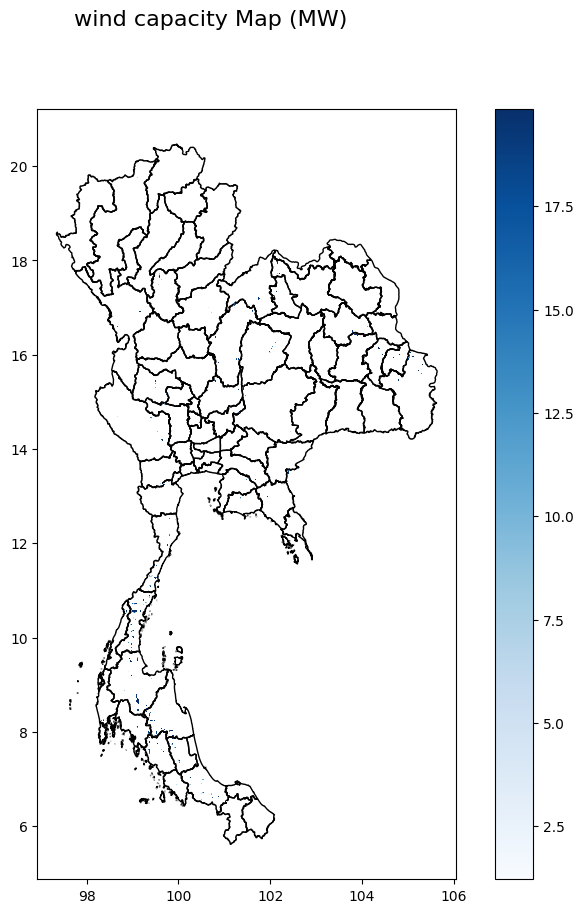

In [23]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  454237.2
R0 Solar =  3264.3
R1 Solar =  96245.55000000002
R2 Solar =  210181.5
R3 Solar =  42222.6
R4 Solar =  102323.25


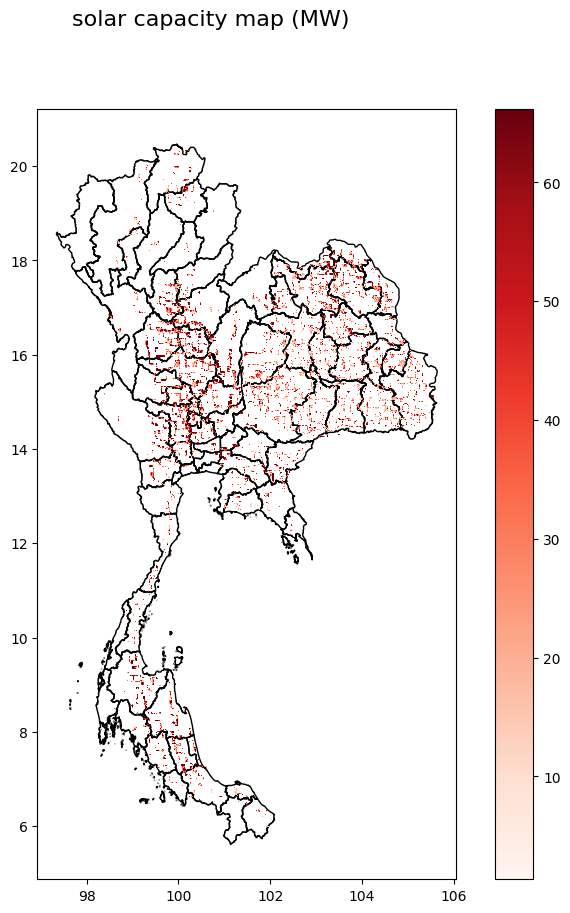

In [24]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


total biomass capacity =  12705.854
R0 biomass =  25.767000000000003
R1 biomass =  2551.455
R2 biomass =  4285.673
R3 biomass =  2505.701
R4 biomass =  3337.258


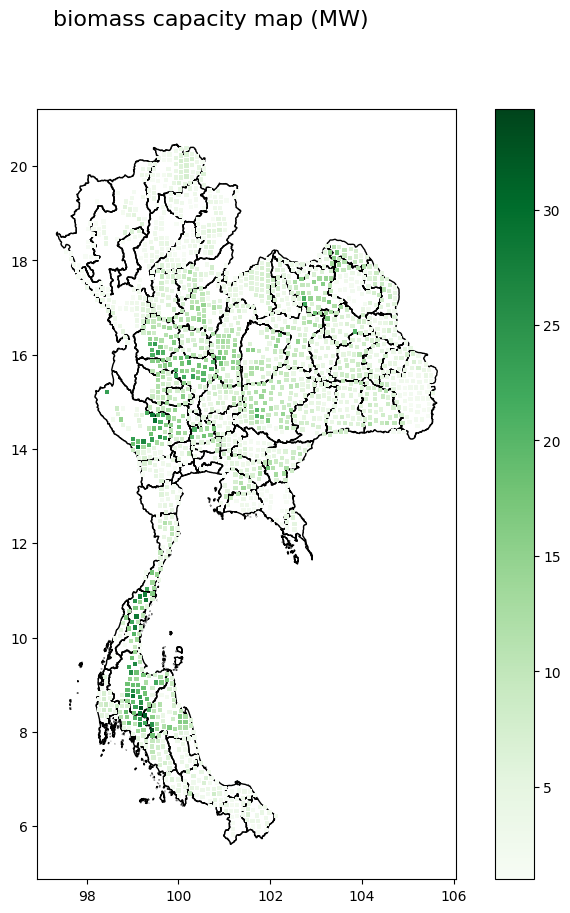

In [25]:
print("total biomass capacity = ", df_biomass['cap_biomass'].sum())
print("R0 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R0'].sum())
print("R1 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R1'].sum())
print("R2 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R2'].sum())
print("R3 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R3'].sum())
print("R4 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('biomass capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_biomass.plot(ax = ax,legend=True,zorder = 1,column = 'cap_biomass',cmap = 'Greens')
except:
    None

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  178.2
total solar capacity =  13269.150000000001
total biomass capacity =  248.83599999999996


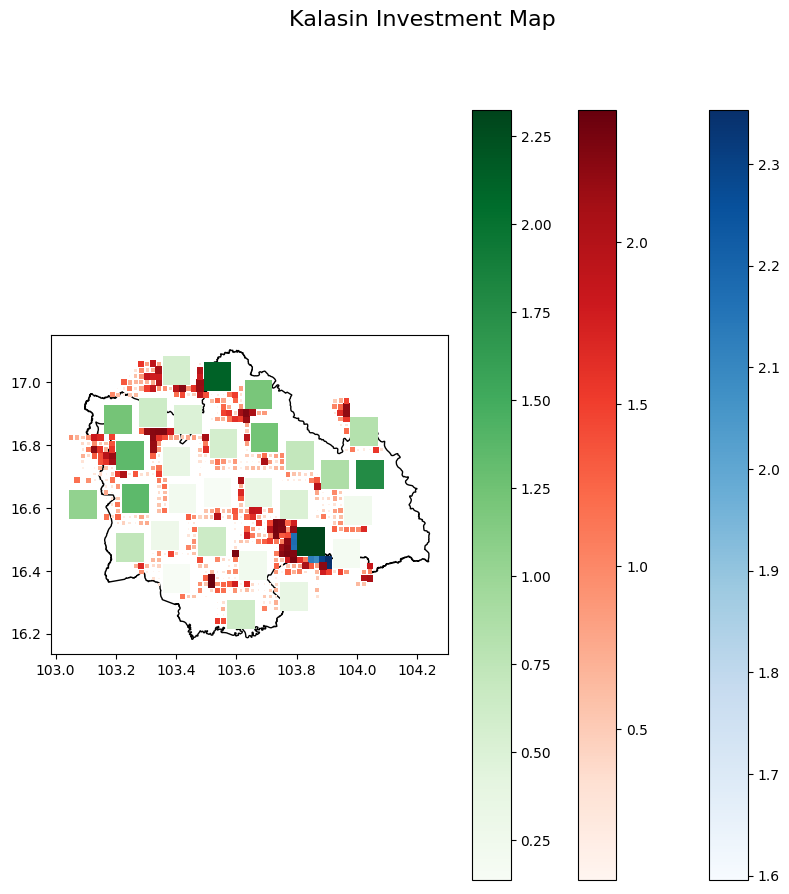

In [26]:
province = 'Kalasin'
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
specificarea = thailandmap.loc[thailandmap['ADM1_EN'] == province]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['ADM1_EN'] == province].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['ADM1_EN'] == province].sum())

print("total biomass capacity = ", df_biomass['cap_biomass'].loc[df_biomass['ADM1_EN'] == province].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(province + ' Investment Map ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Solar',cmap = 'Reds')
except:
    None
try:
    df_biomass.loc[df_biomass['ADM1_EN'] == province].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Biomass',cmap = 'Greens')
except:
    None
